In [69]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [19]:
real_answers = '''
'B'<>'C'<>'A,B,C,D'<>'C'<>'A,B,D'<>'B,C'<>'C'<>'C'<>'T'<>'F'<>'F'<>'T'<>'T'<>'F'<>'T'<>'F'<>'T'<>'F'<>'F'<>'F'<>'C,D'<>'C'<>'B'<>'C'<>'D'<>'D'<>'B'<>'C'<>'C'<>'D'<>'B'<>'C'<>'B'<>'B'<>'C'<>'B'<>'A'<>'T'<>'F'<>'T'<>'T'<>'F'<>'T'<>'B'<>'A'<>'A'<>'B'<>'D'<>'C'<>'A'<>'B'<>'F'<>'A,B,C,D'
'''

In [23]:
real_answers_list = real_answers.replace('\n','').replace("'",'').split("<>")

In [51]:
select_all = []
for i in range(1,5):
    select_all += list(itertools.combinations(['A','B','C','D'], i))
select_all = [','.join(list(i)) for i in select_all]

In [116]:
d = {}
for i in range(len(real_answers_list)):
    d[i + 1] = {}
    d[i + 1]['Answer'] = real_answers_list[i]
    if i + 1 in [2,3,5,6,21,22,53]:
        d[i + 1]['Possible Answers'] = select_all
    elif i + 1 in [27,28]:
        d[i + 1]['Possible Answers'] = ['A','B','C']
    elif i + 1 in [36,37]:
        d[i + 1]['Possible Answers'] = ['A','B','C','D','E']
    elif d[i + 1]['Answer'] in ['T', 'F']:
        d[i + 1]['Possible Answers'] = ['T','F']
    else:
        d[i + 1]['Possible Answers'] = ['A','B','C','D']
    

In [131]:
np.random.seed(42)
all_scores = []
for j in range(10000):
    score = 0
    for i in d:
        guess = np.random.choice(d[i]['Possible Answers'])
        if guess == d[i]['Answer']:
            score += 1
    all_scores.append(score/len(d))

(array([4.2000e+01, 9.1000e+02, 7.9600e+03, 1.5167e+04, 3.5216e+04,
        2.8389e+04, 8.4640e+03, 3.4610e+03, 3.7500e+02, 1.6000e+01]),
 array([0.0754717 , 0.12641509, 0.17735849, 0.22830189, 0.27924528,
        0.33018868, 0.38113208, 0.43207547, 0.48301887, 0.53396226,
        0.58490566]),
 <a list of 10 Patch objects>)

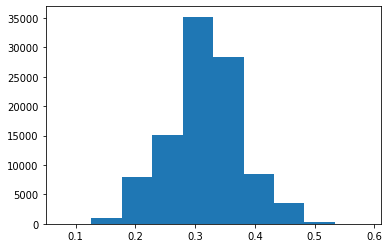

In [132]:
plt.hist(all_scores)

In [133]:
np.mean(all_scores)

0.3166292452830189

In [134]:
np.std(all_scores)

0.06055152408686112